# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Zidane Ramadhan
- **Email:** zidaneramadhan2211@gmail.com
- **ID Dicoding:** zidaneramadhan

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dengan jumlah sewa sepeda harian
- Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda harian
- Apakah terdapat kenaikan penyewaan sepeda dalam bulan?
- Apakah terdapat perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mengimport beberapa library yang diperlukan dalam melakukan analisis data
- Pandas : Untuk memanipulasi dan menganalisis data
- Numpy : Untuk mempercepat proses komputasi numerik
- Matplotlib dan Seaborn : Untuk Visualisasi Data

## Data Wrangling

### Gathering Data

In [ ]:
jam = pd.read_csv("/content/hour.csv")
jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pertama, kita memuat tabel jam yaitu jumlah pengguna sepeda yang dihitung per jam

In [ ]:
hari = pd.read_csv("/content/day.csv")
hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kedua, kita memuat tabel hari yaitu jumlah pengguna sepeda yang dihitung per hari

### Assessing Data

In [ ]:
jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi yang didapat pada tabel jam, didapat bahwa terdapat masalah dengan tipe data tersebut dan jumlah data dari masing-masing kolom sama

In [ ]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi yang didapat pada tabel hari, didapat bahwa terdapat masalah dengan tipe data tersebut dan jumlah data dari masing-masing kolom sama

In [ ]:
jam.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, didapatkan bahwa tidak terdapat missing value pada tabel jam

In [ ]:
hari.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, didapatkan bahwa tidak terdapat missing value pada tabel hari

In [ ]:
print("Jumlah baris pada data hari:", hari.shape[0])
print("Jumlah baris pada data jam:", jam.shape[0])

Jumlah baris pada data hari: 731
Jumlah baris pada data jam: 17379


Dari hasil di atas, didapatkan hasil bahwa jumlah baris pada tabel hari yaitu 731 baris dan tabel jam yaitu 17379 baris

In [ ]:
print("Jumlah duplikasi pada data hari: ", hari.duplicated().sum())
print("Jumlah duplikasi pada data jam: ", jam.duplicated().sum())

Jumlah duplikasi pada data hari:  0
Jumlah duplikasi pada data jam:  0


Dari hasil di atas, didapatkan bahwa kedua tabel yaitu hari dan jam tidak terdapat data duplikat

### Cleaning Data

In [ ]:
hari['dteday'] = pd.to_datetime(hari['dteday'])
hari['season'] = hari.season.astype('category')
hari['mnth'] = hari.mnth.astype('category')
hari['holiday'] = hari.holiday.astype('category')
hari['weekday'] = hari.weekday.astype('category')
hari['workingday'] = hari.workingday.astype('category')
hari['weathersit'] = hari.weathersit.astype('category')

Mengubah tipe data pada tabel hari agar sesuai di mana pada tabel tersebut sebelumnya belum dijadikan kategori pada beberapa kolom sehingga perlu di ubah terlebih dahulu

In [ ]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Hasil dari pengubahan tipe data

In [ ]:
jam['dteday'] = pd.to_datetime(jam['dteday'])
jam['season'] = jam.season.astype('category')
jam['mnth'] = jam.mnth.astype('category')
jam['holiday'] = jam.holiday.astype('category')
jam['weekday'] = jam.weekday.astype('category')
jam['workingday'] = jam.workingday.astype('category')
jam['weathersit'] = jam.weathersit.astype('category')

Mengubah tipe data pada tabel jam agar sesuai di mana pada tabel tersebut sebelumnya belum dijadikan kategori pada beberapa kolom sehingga perlu di ubah terlebih dahulu

In [ ]:
jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Hasil pengubahan tipe data

## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
df_bike = jam.merge(hari, on='dteday', how='inner', suffixes=('_hour', '_day'))
df_bike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Tabel di atas merupakan penggabungan dari jam dan hari berdasarkan dteday di mana diambil yang irisannya dan memberi imbuhan _hour dan _day untuk membedakannya

In [ ]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

df_bike['weather_label'] = df_bike['weathersit_day'].map(weather_labels)

Mendefinisikan cuaca dari weathersit

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  category      
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  category      
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  category      
 7   weekday_hour     17379 non-null  category      
 8   workingday_hour  17379 non-null  category      
 9   weathersit_hour  17379 non-null  category      
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [ ]:
df_bike.describe()

,instant_hour,yr_hour,hr,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,instant_day,yr_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,367.172622,0.502561,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,210.072051,0.500008,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,0.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,185.000000,0.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,1.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,367.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,1.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,549.000000,1.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,1.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,731.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan dari tabel statistika deskriptif di atas, didapatkan bahwa penyewaan sepeda harian terbanyak yaitu sebanyak 8714 dan terendah yaitu 22 dengan rata-rata sebesar 4533,69. Untuk penyewaan sepeda per jam didapatkan paling banyak yaitu sebesar 977 dan terendah yaitu 1 dengan rata-rata yaitu sebesar 189,46.

In [ ]:
df_bike.corr()

<ipython-input-27-a701ee7ef82c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bike.corr()


,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
instant_hour,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,...,0.001357,-0.003416,-0.025841,0.143514,0.145394,0.013548,-0.118361,0.274124,0.666838,0.635346
season_hour,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,...,-0.002335,0.013743,0.014940,0.329317,0.337911,0.204967,-0.237335,0.208511,0.413905,0.408077
yr_hour,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,...,-0.004485,-0.002196,-0.051939,0.043181,0.041497,-0.113688,-0.013849,0.247960,0.599744,0.571927
mnth_hour,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,...,0.010400,-0.003477,0.041683,0.212869,0.220170,0.223727,-0.214538,0.118886,0.291882,0.277704
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,...,-0.003498,0.002285,-0.000535,-0.007823,-0.007840,-0.001111,-0.000113,-0.005508,-0.008389,-0.008729
holiday_hour,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,...,-0.102088,-0.252471,-0.033653,-0.028856,-0.032770,-0.014408,0.006319,0.054134,-0.111327,-0.070344
weekday_hour,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,...,1.000000,0.035955,0.035082,-0.001894,-0.009333,-0.050564,0.018226,0.058700,0.053629,0.064204
workingday_hour,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,...,0.035955,1.000000,0.057122,0.058460,0.057839,0.021347,-0.018746,-0.517844,0.314491,0.068216
weathersit_hour,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,...,0.003311,0.044672,0.601478,-0.098238,-0.100109,0.426635,0.035636,-0.204204,-0.195389,-0.230464
temp_hour,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,...,-0.001795,0.055390,-0.113428,0.947491,0.939540,0.124365,-0.153093,0.511386,0.508241,0.592402


Berdasarkan hasil korelasi di atas, terdapat beberapa feature yang masih berkorelasi tinggi satu sama lain

In [ ]:
df_bike.groupby('mnth_hour')['cnt_hour'].mean().reset_index()

,mnth_hour,cnt_hour
0,1,94.424773
1,2,112.865026
2,3,155.410726
3,4,187.260960
4,5,222.907258
5,6,240.515278
6,7,231.819892
7,8,238.097627
8,9,240.773138
9,10,222.158511


In [ ]:
df_bike.groupby('weather_label')['cnt_hour'].mean().reset_index().sort_values("cnt_hour")

,weather_label,cnt_day
2,Curah Hujan Ringan,1914.700855
1,Kabut,4062.717595
0,Jernih,4895.177083


Berdasarkan hasil di atas, didapatkan bahwa penyewaan terbanyak berada pada cuaca jernih yaitu sebanyak 4895

In [ ]:
jumlah_registered = df_bike.registered_hour.sum() + df_bike.registered_day.sum()
jumlah_registered

66616142

Berdasarkan hasil yang didapat bahwa jumlah pengguna terdaftar sebanyak 66616142.

In [ ]:
jumlah_casual = df_bike.casual_hour.sum() + df_bike.casual_day.sum()
jumlah_casual

15467587

Berdasarkan hasil yang didapat bahwa jumlah pengguna casual sebanyak 15467587.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dengan jumlah sewa sepeda harian

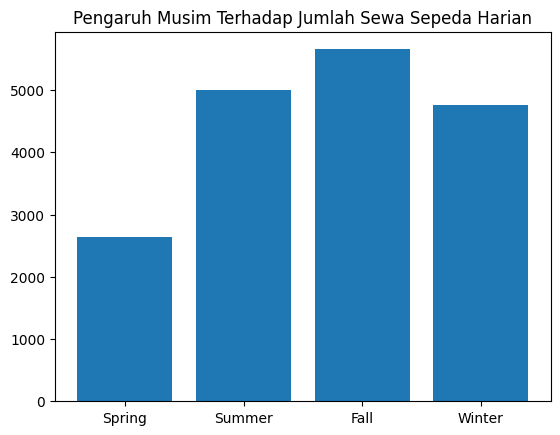

In [ ]:
data_musim = df_bike.groupby('season_day')['cnt_day'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, data_musim)
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

Berdasarkan bar chart di atas, dapat disimpulkan bahwa penjualan sewa sepeda harian terbanyak berada pada musim gugur dan terendah berada pada musim semi

In [ ]:
df_bike.groupby('season_day')['cnt_day'].mean()

season_day
1    2635.348185
2    4995.253119
3    5654.093194
4    4765.366021
Name: cnt_day, dtype: float64

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda harian


<ipython-input-70-dc4ca6492a7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='magma')


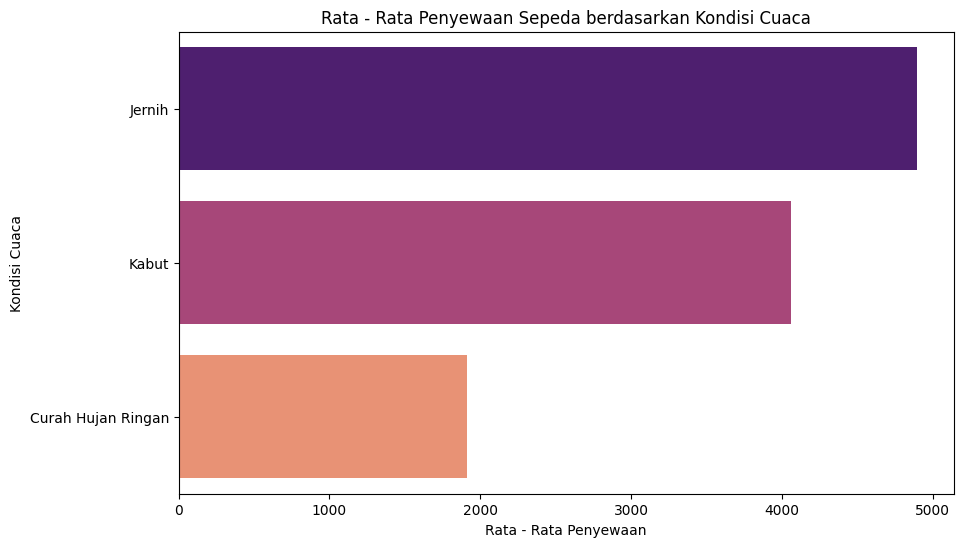

In [ ]:
avg_weather = df_bike.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='magma')

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Rata - Rata Penyewaan')
plt.ylabel('Kondisi Cuaca')

plt.show()

Berdasarkan bar chart horizontal di atas, dapat disimpulkan bahwa rata-rata penyewaan sepeda terbanyak berada pada cuaca jernih

### Pertanyaan 3: Apakah terdapat kenaikan penyewaan sepeda dalam bulan?

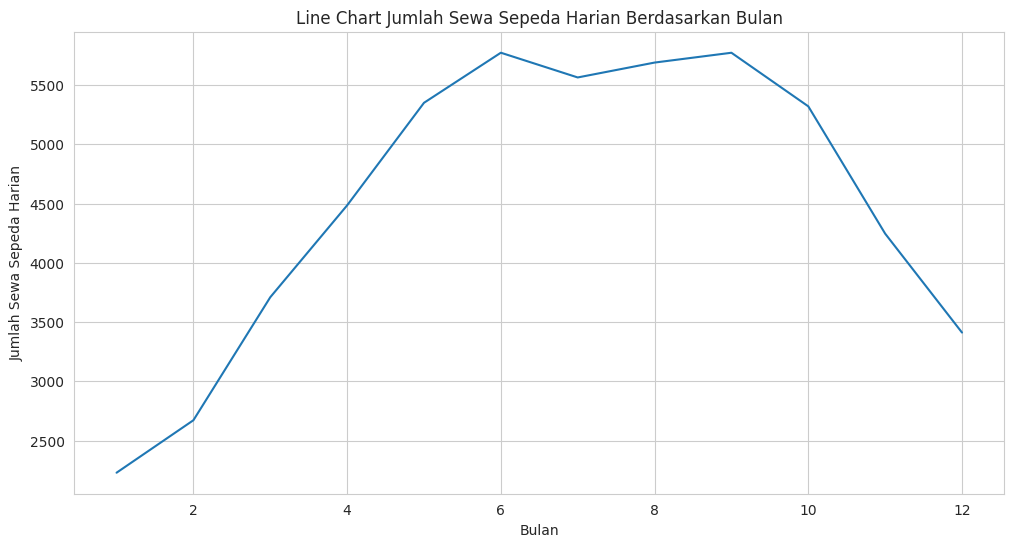

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth_day", y="cnt_day", data=df_bike, errorbar=None)
plt.title("Line Chart Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Berdasarkan hasil yang didapat pada line chart di atas, didapatkan bahwa kenaikan penyewaan sepeda harian berada pada bulan 6 dan 9

<ipython-input-83-f6450fc571fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday_day", y="cnt_day", data=df_bike, palette = "magma")


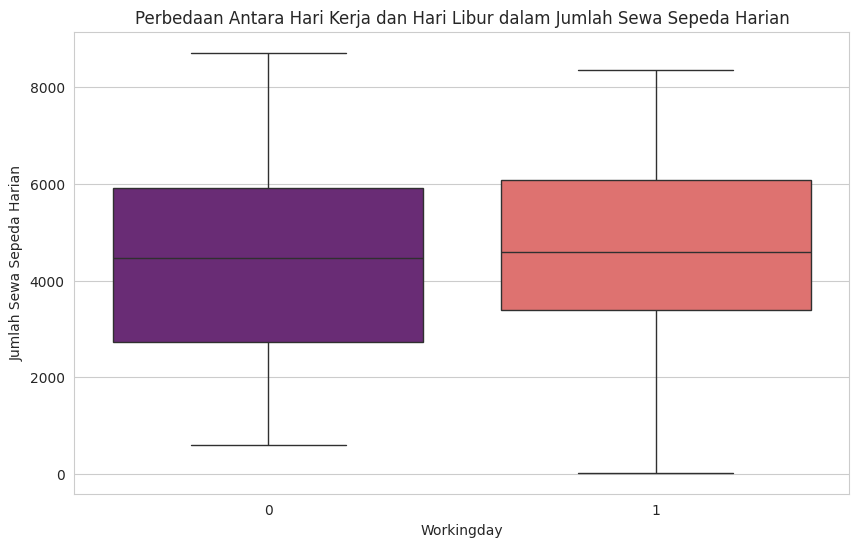

In [ ]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x="workingday_day", y="cnt_day", data=df_bike, palette = "magma")
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Berdasarkan hasil boxplot di atas, didapatkan bahwa jumlah sewa sepeda paling banyak berada pada hari kerja daripada hari libur

## Conclusion

- Berdasarkan pertanyan 1, dapat disimpulkan bahwa penjualan sewa sepeda harian terbanyak berada pada musim gugur dan terendah berada pada musim semi
- Berdasarkan pertanyaan 2, dapat disimpulkan bahwa rata-rata penyewaan sepeda terbanyak berada pada cuaca jernih
- Berdasarkan pertanyaan 3, didapatkan bahwa kenaikan penyewaan sepeda harian berada pada bulan 6 dan 9
- Berdasarkan pertanyaan 4, didapatkan bahwa jumlah sewa sepeda paling banyak berada pada hari kerja daripada hari libur